# Parameter Estimators

*SG2227 Saleh Rezaeiravesh and Philipp Schlatter*

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import math as mt
from scipy import special
from scipy import stats
from scipy.stats import chi2,t,norm

π = mt.pi

### Mean and variance estimators

Here it is important to introduce some notation. The population of the random variable $x_i$ contains all possible realisations of the process. Thus its *true* moments are the population mean $\mu$ and the population variance $\sigma^2$. Typically these values are not known, and must be estimated using a sample of realisations $x_i$.

Formally we write for the population mean
$$\mu := \mathbb{E}[x_i] \ , $$
which can be easier understood in terms of e.g. a time series as follows:
$$\mu = \mathbb{E}[u(t)] = \int_{t_0}^\infty u(t) \rho_T(t) \mathrm{d} t \ ,$$
with a weight function $\rho_T(t)$. However, each practical estimate for the mean is a so-called sample mean $\hat{\mu}=\hat{\mathbb{E}}[u(t)]$, i.e. an approximation of this integral, both in terms of sample frequency and integration length. The hat $\hat{(\cdot)}$ expresses the difference between the population mean and the sample mean.

The sample mean for a sample with $N$ realisations can be computed directly as
$$\overline{x} = \hat{\mu} = \frac{1}{N}\sum_{i=1}^{N} x_i = \hat{\mathbb{E}}[x_i] \ ,$$
where a $\hat{\cdot}$ generally indicates a sample expectation.
The sample mean estimator (SME) is a random function itself. 

The *Law of Large Numbers* says that (in its strong form)
$$\hat{\mu} \rightarrow \mu \quad \text{for} \quad N\rightarrow\infty \ .$$ 
This result ensures that for sufficiently many observations $x_i$ the sample mean converges towards the population mean. It does however not directly state how fast this is going to happen.

It is an unbiased estimator with the expectation
$$\mathbb{E}[\hat\mu] = \frac1N \sum_{i=1}^N \mathbb{E}[x_i] = \mu \ ,$$ and a variance, which for independent and identically distributed (iid) samples is $\mathbb{E}[(\overline{x}-\mu)^2] = \mathbb{V}[\overline{x}] = \sigma^2/N$. The distribution of the sample mean is normal, due to the central limit theorem (CLT)
$$\overline{x} \sim \mathcal{N}(\mu, \frac{\sigma^2}{N}) \ .$$


The sample variance is computed as
$$\tilde{s}^2 = \frac{1}{N} \sum_{i=1}^N (x_i-\overline{x})^2 = \hat{E}[(x_i-\overline{x})^2] \ ,$$
i.e. it is computed based on data from the sample only, not using any of the (unknown) parameters $\mu$ or $\sigma$. It turns out that $\tilde{s}^2$ is a *biased sample variance*. The unbiased sample variance estimator is
$$s^2 = \hat{\sigma}^2= \frac{1}{N-1} \sum_{i=1}^N (x_i-\overline{x})^2 = \frac{N}{N-1} \tilde{s}^2 \ .$$ 
Note that $s^2>\tilde{s}^2$. The Bessel correction is only needed for small sample sizes. One can use $s^2$ to estimate the variance of the mean, 
$$ V[\overline{x}] \approx \frac{s^2}{N}=\frac{1}{N(N-1)} \sum_{i=1}^N (x_i-\overline{x})^2 .$$

As for the sample mean $\overline{x}$ discussed above, $s^2$ is a random variable. For independent observations from a normal distribution, one can derive that the pdf of $s^2$ follows a $\chi^2$-distribution,
$$(N-1)\frac{s^2}{\sigma^2} \sim \chi^2_{N-1} \ ,$$
with expectation $E[s^2] = \sigma^2$ and variance $V[s^2] = \frac{2\sigma^4}{N-1}$. Without the assumption of normality of the original sample, then only the expection $E[s^2] = \sigma^2$.



In [3]:
# some data
mu, sigma = 1, 2 # mean and standard deviation
N=10000
s = np.random.normal(mu, sigma, N)
s = mu+np.sqrt(12)*sigma*(np.random.random_sample((N,))-0.5)

In [4]:
Var = (sum(s**2)/N-(sum(s)/N)**2)
Var

3.9640674451912017

In [5]:
np.var(s,ddof=0) # biased variance

3.9640674451912288

In [6]:
np.var(s,ddof=1) # unbiased variance estimator

3.9644638915803867

In [7]:
N/(N-1)*Var

3.9644638915803596

Difference between population variance and sample variance: Bessel's correction $N/(N-1)$. The straigtforward explanation is that the sample variance is biased because it always underpredicts the population variance because the sample mean is always more central and thus the individual squared differences are smaller. Thus there needs to be a correction larger than 1. It turns out that one can estimate this deviation per individual term as $(E(x_\mathrm{sample})-\mu)^2$. This turns out to be the variance of the sample mean, $\sigma^2/N$. Thus we assume now that the sample variance is underpredicting as $\sigma_\mathrm{unbiased}^2(1-1/N)$, which is exactly the Bessel's correction. 

<IPython.core.display.Javascript object>


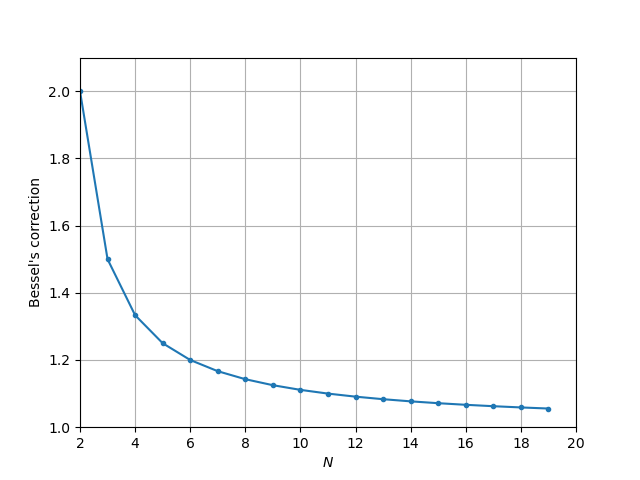

In [8]:
plt.figure()
n=np.arange(2,20)
plt.plot(n,n/(n-1),'.-')
plt.grid()
plt.xlabel('$N$')
plt.xlim(2,20)
plt.ylim(1,2.1)
plt.ylabel("Bessel's correction")
plt.show()

### Hands-on:
1. Compute the **distribution of observations $x_i$** taken from a sample of any distribution (e.g. uniform distribution)
2. Compute the **distribution of sample means $\hat{\mu}$** of length $N$ for any distribution (e.g. normal distribution)
3. Plot the **estimated** normal distribution for the distribution obtained in 2.
4. Plot the **computed** normal distribution for the distribution obtained in 2.

---
---
---
---
---
---
---
---
---

### Demonstration of the sample estimators

In [4]:
def bimodal(N):
    toss = np.random.randint(0,2,size=N)
    a=np.zeros((N,2))
    a[:,0]= np.random.normal(-5, 2.5, N)
    a[:,1]= 0.5*np.random.normal( 5, 2.5, N)
    b=np.zeros(N)
    for k in range(N):
        b[k] = a[k,int(toss[k])]
    return b

In [39]:
N = 10000
M = 10000
mm = np.zeros(M)
vv = np.zeros(M)

# population mean and variance
μ = 5
σ = 2.5

# compute sample mean and variance
for i in range(M):
    ss = μ+np.sqrt(12)*σ*(np.random.random_sample((N,))-0.5)
    #ss = np.random.normal(μ, σ, N)
    #ss = μ+np.sqrt(12)*σ*(np.random.random_sample((N,))-0.5)+np.random.normal(0, 2*σ, N)*np.random.normal(0, σ, N)
    # ss = np.random.lognormal(0,1,N)
    #ss = bimodal(N)
    mm[i] = np.mean(ss)
    vv[i] = np.var(ss,ddof=1)

### observations $x_i$

<IPython.core.display.Javascript object>


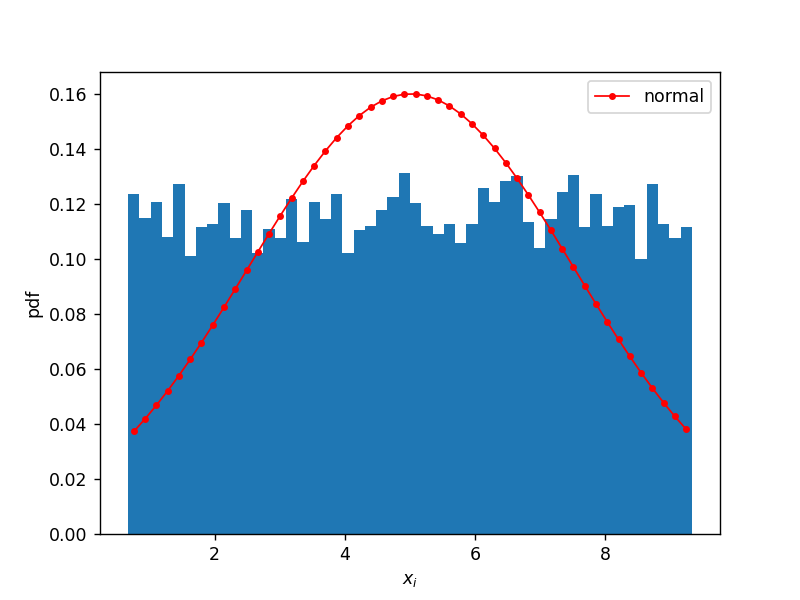

In [40]:
nbins = 50  # number of bins

plt.figure()
count, bins, ignored = plt.hist(ss, nbins, density=True)

bc = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)

plt.plot(bc, norm.pdf(bc,np.mean(ss),np.std(ss)), '.-',linewidth=1, color='r',label='normal')
plt.xlabel('$x_i$');plt.ylabel('pdf')
plt.legend()
plt.show()

### sample means $\hat{\mu}_x$

<IPython.core.display.Javascript object>


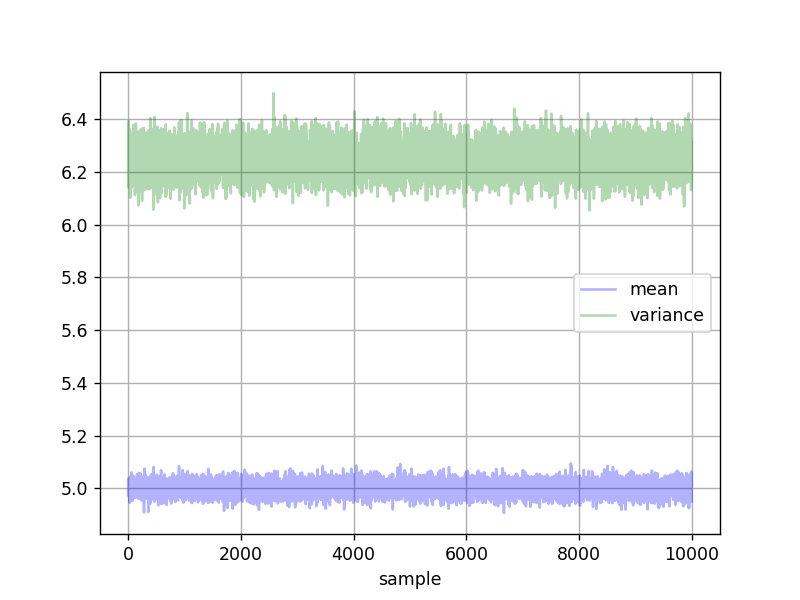

In [41]:
plt.figure()
plt.plot(mm,'b',label='mean',alpha=0.3)
plt.plot(vv,'g',label='variance',alpha=0.3)

plt.grid('on')
plt.xlabel('sample')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


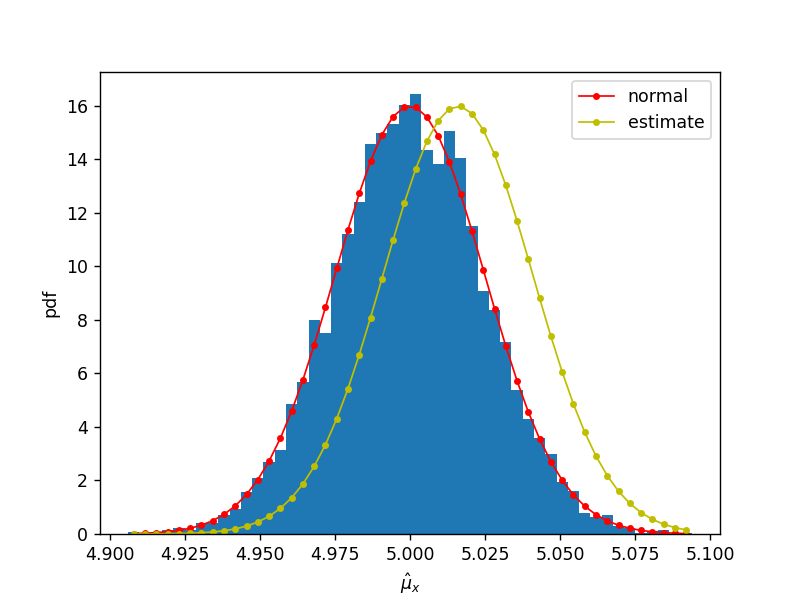

In [42]:
nbins = 50  # number of bins

plt.figure()
count, bins, ignored = plt.hist(mm, nbins, density=True)

bc = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)

plt.plot(bc, norm.pdf(bc,np.mean(mm),np.std(mm)), '.-',linewidth=1, color='r',label='normal')

plt.plot(bc, norm.pdf(bc,np.mean(ss),np.sqrt(np.var(ss))/np.sqrt(N)), '.-',linewidth=1, color='y',label='estimate')

plt.xlabel('$\hat{\mu}_x$');plt.ylabel('pdf')
plt.legend()
plt.show()

In [43]:
np.std(mm),np.sqrt(np.var(ss))/np.sqrt(N)

(0.024938188452065718, 0.024942331583876175)

In [46]:
print('Estimate for mean: %.4f +- %.4f' % (np.mean(ss),1.96*np.sqrt(np.var(ss))/np.sqrt(N)))
print('Correct value    : %.4f +- %.4f' % (np.mean(mm),1.96*np.std(mm)))

Estimate for mean: 5.0159 +- 0.0489
Correct value    : 4.9998 +- 0.0489


### sample variance $\hat{\sigma}^2_x$

<IPython.core.display.Javascript object>


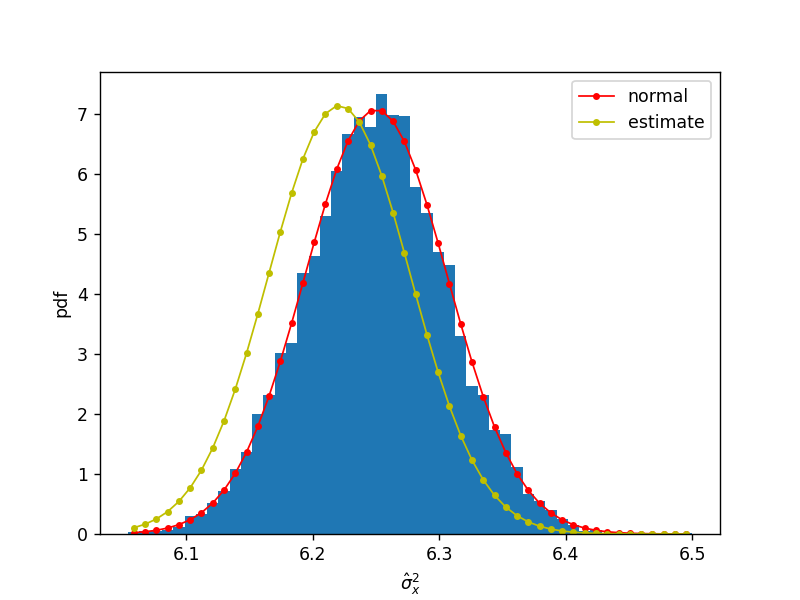

In [45]:
nbins = 50  # number of bins

plt.figure()
count, bins, ignored = plt.hist(vv, nbins, density=True)

bc = (bins[0:-1]+bins[1:])/2   # bin centres
db = bins[1]-bins[0]           # bin size (assuming constant)

plt.plot(bc, norm.pdf(bc,np.mean(vv),np.std(vv)), '.-',linewidth=1, color='r',label='normal')

ku=stats.kurtosis(ss)+3 
plt.plot(bc, norm.pdf(bc,np.var(ss),np.var(ss)*np.sqrt((ku-1)/N)), '.-',linewidth=1, color='y',label='estimate')

plt.xlabel('$\hat{\sigma}^2_x$');plt.ylabel('pdf')
plt.legend()
plt.show()

In [238]:
ku=stats.kurtosis(ss)+3 
np.std(vv),np.var(ss)*np.sqrt((ku-1)/N)

(0.2777859221560446, 0.2889512372732403)

In [239]:
ku

3.0778048047409547

In [240]:
print('Estimate for variance: %.4f +- %.4f' % (np.var(ss),1.96*np.var(ss)*np.sqrt((ku-1)/N )))
print('correct value        : %.4f +- %.4f' % (np.mean(vv),1.96*np.std(vv)))

Estimate for variance: 6.3390 +- 0.5663
correct value        : 6.2582 +- 0.5445


### Hands-on: 
Take the real data, and batch it such that it becomes independent. Plot mean and variance distributions for a few batch sizes.

---
---
---
---
---
---